# Assignment 1 – Polynomial Regression using ``torch.nn.Module``

- Please create a copy of this notebook onto your own Drive before working on it: `File-->Save a copy in Drive`
- Please submit your ipynb file named with your initials, e.g. `YGM-Assignment1.ipynb` with **the CODE cells output visible** to support your answers and **TEXTUAL answers given as comments** in the code cells.
- Deadline for submission is **midnight, Friday, March 18th.**

## Neural Network Model for Polynomial Regression
Your task is to build a neural network for the function $y = x^2 + 3x$

Requirements:
- You MUST use `torch.nn.Module` to define your neural network class.
- The training data should have **10 input values, $x$, and the correct corresponding output values, $y$,** for the function $y = x^2 + 3x$
- The NN may have **maximum TWO hidden layers**.
- You may use a **maximum of 500 neuron units in each hidden layer**.
- You may train over a **maximum of 1000 epochs**.
- Use suitable activation functions that have been covered in class.
- You MUST use the **Adam optimiser, `torch.optim.Adam()`** and the **MSE loss function**.
- **IMPORTANT:** Your model must have a **LOSS OF LESS THAN 0.01** at the end of training.
- **Train your model at least 3 times** to see that the final loss value is stable across all three runs.
- Print the loss at every 25th iteration.
- Test the model on $x=10$.
- **Save your training loss** at every iteration.

Note:
- If your model does not achieve a loss of less than 0.01, you will still be awarded marks for `Q7 – Q10` as long as you can explain your answers accordingly.

In [1]:
import torch
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [2]:
# 1. Define training data for a the mathematical formula y = x^2 + 3x (3) //10 input values, x, and the correct corresponding output values, y
x = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]], dtype = torch.float32)
y = torch.tensor([[3],[10],[18],[28],[40],[54],[70],[88],[108],[130]], dtype = torch.float32)

In [21]:
# 2. Define NN class (10) // max 2 hidden layers,max 500 neurons in each hidden layers
class MyNN(nn.Module):
  def __init__(self, hidden_size):
    super().__init__()
    self.linear1 = nn.Linear(1,hidden_size)
    self.activation1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, hidden_size)
    self.activation2 = nn.LeakyReLU()
    self.linear3 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation1(x)
    x = self.linear2(x)
    x = self.activation2(x)
    x = self.linear3(x)
    return x

# 3. Create an instance of NN model (2)

hidden_size = 500
model = MyNN(hidden_size)

# 4. Loss and Optimiser (2) // MSE loss function, Adam optimiser: torch.optim.Adam()

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)


# 5. Training loop // over a max of 1000 epochs
num_epochs = 1000

loss_saved = []                    # 5.4 to save traning loss at every epochs, 1)make empty list
  # 5.1 Forward pass (2)
for epoch in range(num_epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred,y)
  loss_saved.append(loss.item())   # 5.4 to save traning loss at every epochs, 2)plug empty list into the loop
  # 5.2 Backward pass (3)
  opt.zero_grad()
  loss.backward()
  opt.step()
  # 5.3 Print loss every 25th epoch (1)
  if (epoch+1) %25 == 0:
    print(f'Epoch:{epoch+1}/{num_epochs}, Loss={loss.item():.4f}')

Epoch:25/1000, Loss=183.8112
Epoch:50/1000, Loss=14.9289
Epoch:75/1000, Loss=2.6703
Epoch:100/1000, Loss=0.6409
Epoch:125/1000, Loss=0.2599
Epoch:150/1000, Loss=0.1310
Epoch:175/1000, Loss=0.0863
Epoch:200/1000, Loss=0.0625
Epoch:225/1000, Loss=0.1929
Epoch:250/1000, Loss=0.0608
Epoch:275/1000, Loss=0.0382
Epoch:300/1000, Loss=0.0249
Epoch:325/1000, Loss=0.0182
Epoch:350/1000, Loss=0.0138
Epoch:375/1000, Loss=0.0100
Epoch:400/1000, Loss=0.0068
Epoch:425/1000, Loss=0.0080
Epoch:450/1000, Loss=0.0057
Epoch:475/1000, Loss=0.0025
Epoch:500/1000, Loss=0.0013
Epoch:525/1000, Loss=0.0731
Epoch:550/1000, Loss=0.1116
Epoch:575/1000, Loss=0.0064
Epoch:600/1000, Loss=0.0021
Epoch:625/1000, Loss=0.0008
Epoch:650/1000, Loss=0.0004
Epoch:675/1000, Loss=0.0002
Epoch:700/1000, Loss=0.0001
Epoch:725/1000, Loss=0.0448
Epoch:750/1000, Loss=0.5212
Epoch:775/1000, Loss=0.0078
Epoch:800/1000, Loss=0.0037
Epoch:825/1000, Loss=0.0009
Epoch:850/1000, Loss=0.0003
Epoch:875/1000, Loss=0.0002
Epoch:900/1000, Loss

In [22]:
print(loss_saved) # for checking whether the losses are well saved or not.

[4674.158203125, 572.31591796875, 2749.50390625, 696.3869018554688, 227.774169921875, 742.56787109375, 998.9296875, 860.6602783203125, 518.734375, 216.0055694580078, 186.7678985595703, 418.78997802734375, 561.3822021484375, 431.4515075683594, 219.3787384033203, 139.186279296875, 205.9633026123047, 299.34967041015625, 331.4310607910156, 284.5929260253906, 193.30850219726562, 119.61851501464844, 111.98297119140625, 156.6352996826172, 183.8111572265625, 149.15623474121094, 88.37186431884766, 66.86940002441406, 98.66951751708984, 114.301513671875, 88.30006408691406, 51.635284423828125, 41.304134368896484, 54.772850036621094, 59.3276252746582, 44.74518585205078, 29.57485008239746, 30.30476951599121, 39.15170669555664, 38.101409912109375, 26.686260223388672, 22.71957015991211, 25.35381317138672, 24.613351821899414, 19.449100494384766, 16.82830810546875, 18.77535057067871, 19.777700424194336, 17.25826072692871, 14.928860664367676, 14.847055435180664, 14.90973949432373, 13.271493911743164, 11.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

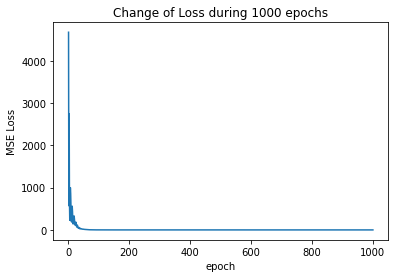

In [23]:
# 6. Visualize (3)
# Plot the landscape of your training loss (MSE loss) saved for every epoch.
# y-axis would mean MSE loss and x-axis would mean the epoch of your training.
# Hint: you should plot (1,first MSE loss), ... ,(last epoch number,last MSE loss)
epoch_range = np.linspace(1,1000,1000)

plt.title("Change of Loss during 1000 epochs")
plt.plot(epoch_range, loss_saved)
plt.xlabel('epoch')
plt.ylabel('MSE Loss')
plt.show()

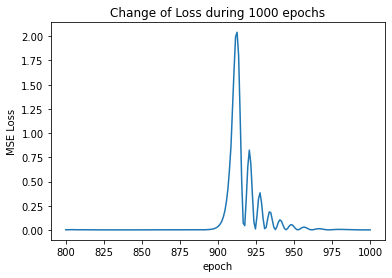

In [25]:
epoch_range = np.linspace(800,1000,200) # want to check popping point

plt.title("Change of Loss during 1000 epochs")
plt.plot(epoch_range, loss_saved[800:1000])
plt.xlabel('epoch')
plt.ylabel('MSE Loss')
plt.show()

In [26]:
# 7. Prediction (2)
# Let's use the model on a new number x, defined as a tensor
# Get the model's prediction for this new x

test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

print(f'Model prediction for {test_num} is {model(test).item():.4f}')

Model prediction for 10 is 129.9892


In [33]:
test_num = 20
test = torch.tensor([test_num], dtype=torch.float32)

print(f'Model prediction for {test_num} is {model(test).item():.4f}')

Model prediction for 20 is 342.0435


In [28]:
test_num = 100
test = torch.tensor([test_num], dtype=torch.float32)

print(f'Model prediction for {test_num} is {model(test).item():.4f}')

Model prediction for 100 is 1918.9785


In [11]:
# Make sure the output of your code cells support your answers below:

# Q8. Describe how the loss changed over time during training. (2)
# A8/ At the very first part of epochs, the Loss is very large. As training goes on, the loss becomes really tiny very quickly.
# However, this minimized loss ocassionally popping up as described in the very upper plot.


# Q9. Is the prediction for x=10 close enough to the ideal value of 130? 
# Why do you think the prediction is or isn't close enough to the ideal value? (2)
# A9/ Yes the predicted value of 10 is very closed to 130 which is the correspondent value of our assumption function.
# Because x = 10 is included in training input, then it is well predicted by this model.

# Q10. What are the predictions for x=20 and x=100? Based on these predictions, 
# comment on whether the model has captured the relationship between the training inputs and outputs. (2)
# Actually it is not well predicted, there is large difference between predicted value and correspondent value.
# x = 20, y = 460, y_pred = 342.0435
# x = 100, y = 10,300, y_pred = 1918.9785
# I think it's because 20 and 100 are not in the traning input sets.

# Q11. Apart from tweaking the number of epochs and the number of neuron units in the hidden layer, think
# of AT LEAST ONE more thing you would do to try to improve the model. You do NOT have to follow the 
# requirements nor to implement anything. (1)
# Through a number of iteration, I have changed a lot of hyperparameters like # of hidden layers, # of epochs,
# and # of learning rate.
# However, I realized that this kind of changing hyperparameters only reduces the loss of that training set, 
# and that there is a limit to predicting all other values.
# So I think more random training sets(more input and correspondent output) are needed to predict all values.